In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import glob
from mpl_toolkits import mplot3d
%matplotlib notebook

In [20]:
# load in all csv files in current folder and merge them to one dataframe 
parameter_setting = '400_50'
parameter_setting = ''
all_filenames = [i for i in glob.glob(f'resultsSun Apr 04'+'*{parameter_setting}.csv')]
df = pd.concat([pd.read_csv(f, sep=r'\s*,\s*') for f in all_filenames])
means = df.groupby(['cell_density','barrier_density']).mean()
df = means.reset_index()
print(df.shape)

(305, 11)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [28]:
def create_3d_scatterplot(z_values, name, savepath=None):
    """
    create a 3d scatter plot of a given z label axis. x and y are by default cell and barrier desnity
    :param z_values (array)
    :param name (string) title of the plot
    :param savepath (string) location&name to save plot with
    """
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df['cell_density'], df['barrier_density'], z_values, c=z_values, cmap='viridis', alpha=0.6) 
    ax.set_xlabel('Cell density')
    ax.set_ylabel('Barrier density')
    ax.set_zlabel(name)
    ax.set_title(name)
    fig.tight_layout()
    if savepath is not None:
        plt.savefig(savepath)
    plt.show()

## Average direction of movement

<IPython.core.display.Javascript object>


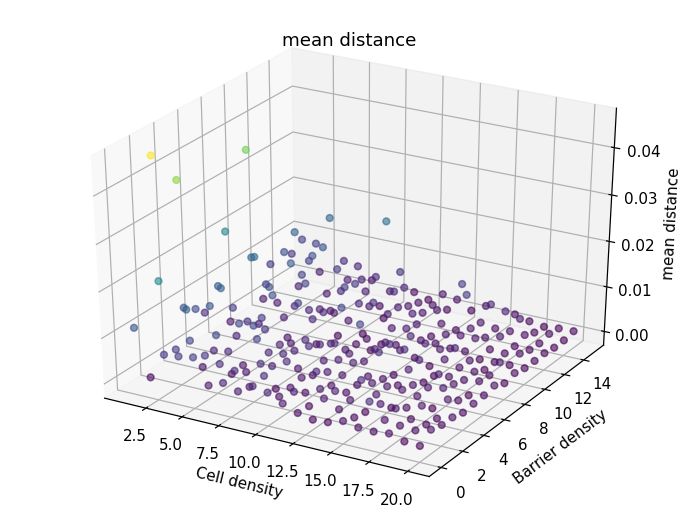

In [30]:
## mean norm of direction
mean_dir = np.sqrt(np.power(df['mean_xdir'], 2) + np.power(df['mean_ydir'], 2))
create_3d_scatterplot(mean_dir, 'mean distance')

<IPython.core.display.Javascript object>


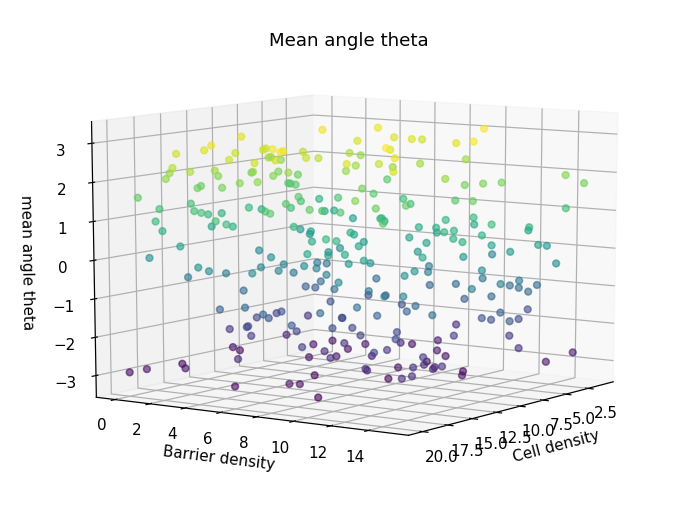

In [27]:
## 2d surface plot of mean angle
mean_angles = np.arctan2(df['mean_ydir'], df['mean_xdir'])
create_3d_scatterplot(mean_angles)

<IPython.core.display.Javascript object>


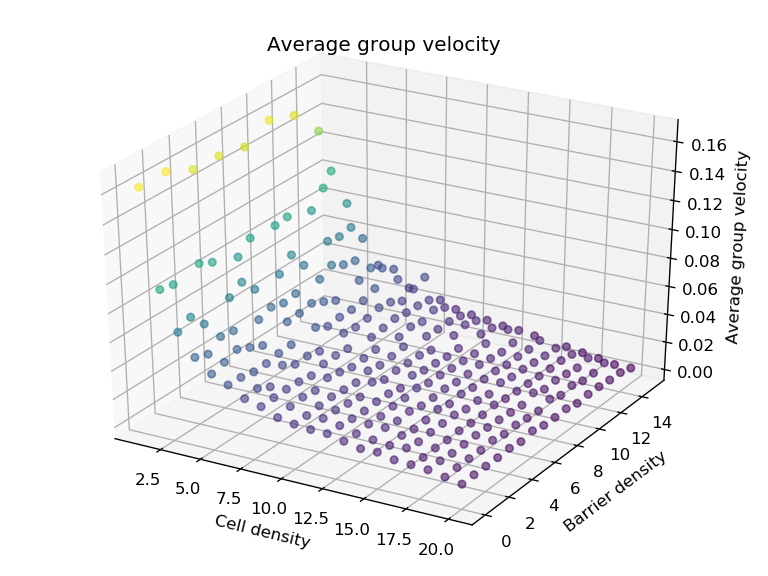

In [33]:
## mean velocity -> group velocity:
avg_group_velocity = df['avg_group_velocity'].to_numpy()
create_3d_scatterplot(avg_group_velocity,'Average group velocity')

<IPython.core.display.Javascript object>


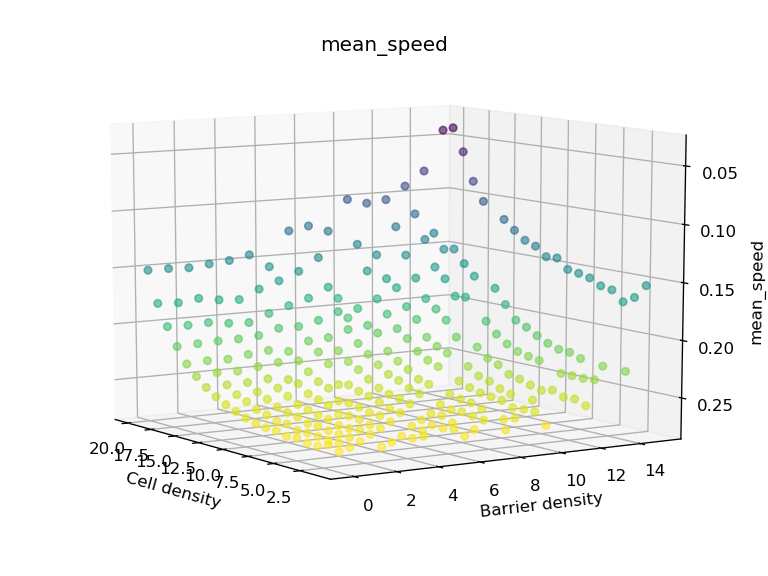

In [34]:
# mean speed
avg_group_velocity = df['mean_speed'].to_numpy()
create_3d_scatterplot(avg_group_velocity,'mean_speed')

In [35]:
## dont look below!




In [36]:
# ## dead code:
# def read_column_from_df(df, column_name,nan=False):
#     """
#     get column from the dataframe, excluding simulations without cells
#     """
#     col = df[column_name].to_numpy()
#     if not nan:
#         col = col[df['number_of_cells']>0]
#     return col

# cell_density = read_column_from_df(df, 'cell_density')
# barrier_density = read_column_from_df(df, 'barrier_density')
# mean_xdir = read_column_from_df(df, 'mean_xdir')
# mean_ydir = read_column_from_df(df, 'mean_ydir')

# #print(cell_density.shape, barrier_density.shape, mean_xdir.shape, mean_ydir.shape)
## analysis 1: effect of number of barriers 
# mean_norms = np.zeros(len(np.unique(barrier_density)))

# fig = plt.figure()
# for i, barrier_dens in enumerate(np.unique(barrier_density)):
#     idx = (barrier_density == barrier_dens) #np.logical_and(cell_density==fixed_cell_density, barrier_density == barrier_dens)
#     x_dirs, y_dirs = mean_xdir[idx], mean_ydir[idx]
#     color= 'red' if i<10 else 'blue'
#     for j, (x_dir, y_dir) in enumerate(zip(x_dirs,y_dirs)):
#         if i==0:
#             plt.arrow(0,0, x_dir, y_dir,color=color, label='Barrier density < 10')    
#         if i==10:
#             plt.arrow(0,0, x_dir, y_dir,color=color, label='Barrier density >= 10')    
#         else:
#             plt.arrow(0,0, x_dir, y_dir,color=color)    

#     # compute norm of the mean direction vectors
#     directions = np.array([x_dirs, y_dirs]).T  
#     mean_norms[i] = np.linalg.norm(directions)

# plt.xlim(-0.05, 0.05)
# plt.ylim(-0.05, 0.05)
# plt.legend()
# plt.show()
    
    
# plt.bar(np.unique(barrier_density), mean_norms)
# plt.ylabel('Norm of the mean of the direction vectors')
# plt.xlabel('Barrier density')
# plt.show()

## analysis 2: effect of number of cells
# mean_norms = np.zeros(len(np.unique(cell_density)))

# fig, ax = plt.subplots(1,1)
# for i, cell_dens in enumerate(np.unique(cell_density)):
#     idx = (cell_density == cell_dens) #np.logical_and(cell_density==fixed_cell_density, barrier_density == barrier_dens)
#     x_dirs, y_dirs = mean_xdir[idx], mean_ydir[idx]
#     color= 'red' if i<10 else 'blue'
#     for j, (x_dir, y_dir) in enumerate(zip(x_dirs,y_dirs)):
#         if i==0:
#             ax.arrow(0,0, x_dir, y_dir,color=color, label='Cell density < 10')    
#         if i==10:
#             ax.arrow(0,0, x_dir, y_dir,color=color, label='Cell density >= 10')    
#         else:
#             ax.arrow(0,0, x_dir, y_dir,color=color, label='test')    

#     # compute norm of the mean direction vectors
#     directions = np.array([x_dirs, y_dirs]).T  
#     mean_norms[i] = np.linalg.norm(directions)

# plt.xlim(-0.05, 0.05)
# plt.ylim(-0.05, 0.05)
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels)
# plt.legend()
# plt.show()
    
# # Bar plot of cell density vs. mean of norm of direction
# plt.bar(np.unique(cell_density), mean_norms)
# plt.ylabel('Norm of the mean of the direction vectors')
# plt.xlabel('Cell density')
# plt.show()